In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model, Sequential
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#!pip install -U keras-tuner


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Colab_data/CC_FRAUD.csv")


In [5]:
df


,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,12.95,LEGIT
1,NEKSXUK.NET,KK,680,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,38.85,LEGIT
2,XOSOP.COM,UO,432,3,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,38.85,LEGIT
3,TMA.COM,KR,119,23,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,11.01,LEGIT
4,VUHZRNB.COM,PO,614,9,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,12.95,LEGIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94677,XOSOP.COM,MO,685,11,11,0,0,0,1,1,0,1,3,0,8.112,15,1,49.95,49.95,LEGIT
94678,RONHGNCN.COM,KR,108,16,16,0,0,1,0,0,1,1,4,0,11.248,10,4,12.95,12.95,LEGIT
94679,XOSOP.COM,VO,601,18,18,0,0,1,1,1,0,1,2,0,27.824,23,0,38.85,38.85,LEGIT
94680,VUHZRNB.COM,LO,398,23,23,0,0,0,0,0,0,1,3,0,31.904,20,0,12.95,12.95,LEGIT


In [6]:
df.shape

(94682, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94682 entries, 0 to 94681
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DOMAIN         94682 non-null  object 
 1   STATE          94682 non-null  object 
 2   ZIPCODE        94682 non-null  int64  
 3   TIME1          94682 non-null  int64  
 4   TIME2          94682 non-null  int64  
 5   VIS1           94682 non-null  int64  
 6   VIS2           94682 non-null  int64  
 7   XRN1           94682 non-null  int64  
 8   XRN2           94682 non-null  int64  
 9   XRN3           94682 non-null  int64  
 10  XRN4           94682 non-null  int64  
 11  XRN5           94682 non-null  int64  
 12  VAR1           94682 non-null  int64  
 13  VAR2           94682 non-null  int64  
 14  VAR3           94682 non-null  float64
 15  VAR4           94682 non-null  int64  
 16  VAR5           94682 non-null  int64  
 17  TRN_AMT        94682 non-null  float64
 18  TOTAL_

In [8]:
df.isna().sum()

DOMAIN           0
STATE            0
ZIPCODE          0
TIME1            0
TIME2            0
VIS1             0
VIS2             0
XRN1             0
XRN2             0
XRN3             0
XRN4             0
XRN5             0
VAR1             0
VAR2             0
VAR3             0
VAR4             0
VAR5             0
TRN_AMT          0
TOTAL_TRN_AMT    0
TRN_TYPE         0
dtype: int64

In [9]:
df['TRN_TYPE'].value_counts()

LEGIT    92588
FRAUD     2094
Name: TRN_TYPE, dtype: int64

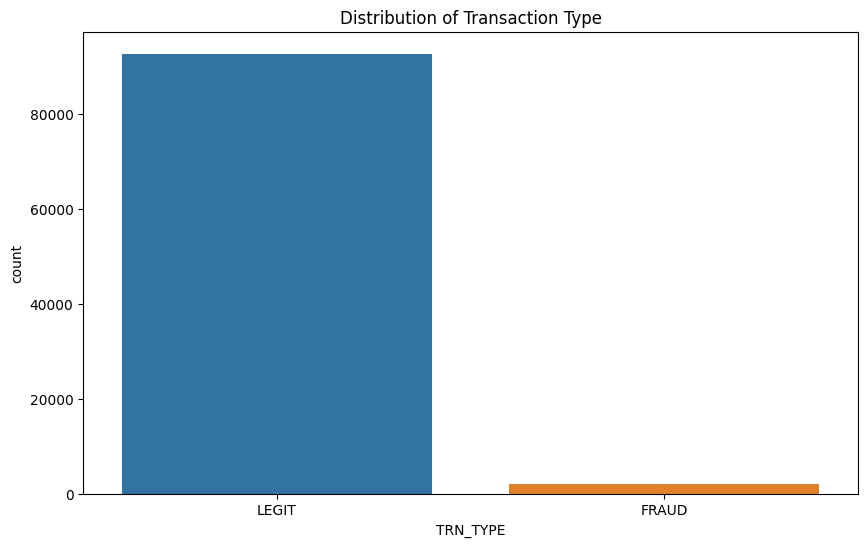

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TRN_TYPE')
plt.title('Distribution of Transaction Type')
plt.show()

In [11]:
data_summary = df.describe(include='all')
data_summary

,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
count,94682,94682,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682
unique,9809,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,TMA.COM,KR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LEGIT
freq,16451,18676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92588
mean,NaN,NaN,454.379470,13.864726,13.875858,0.113306,0.018367,0.546989,0.541127,0.401185,0.019888,6.176676,2.419203,0.425561,5.716101,13.984115,1.375689,25.635312,25.626179,NaN
std,NaN,NaN,228.279524,5.263233,5.258338,0.316968,0.134274,0.497790,0.498308,0.490141,0.139615,102.977443,1.003760,0.494430,31.354601,6.516851,2.423941,14.190485,14.198761,NaN
min,NaN,NaN,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-258.120000,6.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,166.000000,10.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,-12.408000,8.000000,0.000000,12.950000,12.950000,NaN
50%,NaN,NaN,600.000000,14.000000,14.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,11.640000,12.000000,0.000000,25.900000,25.900000,NaN
75%,NaN,NaN,655.000000,18.000000,18.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000,28.784000,19.000000,2.000000,38.850000,38.850000,NaN


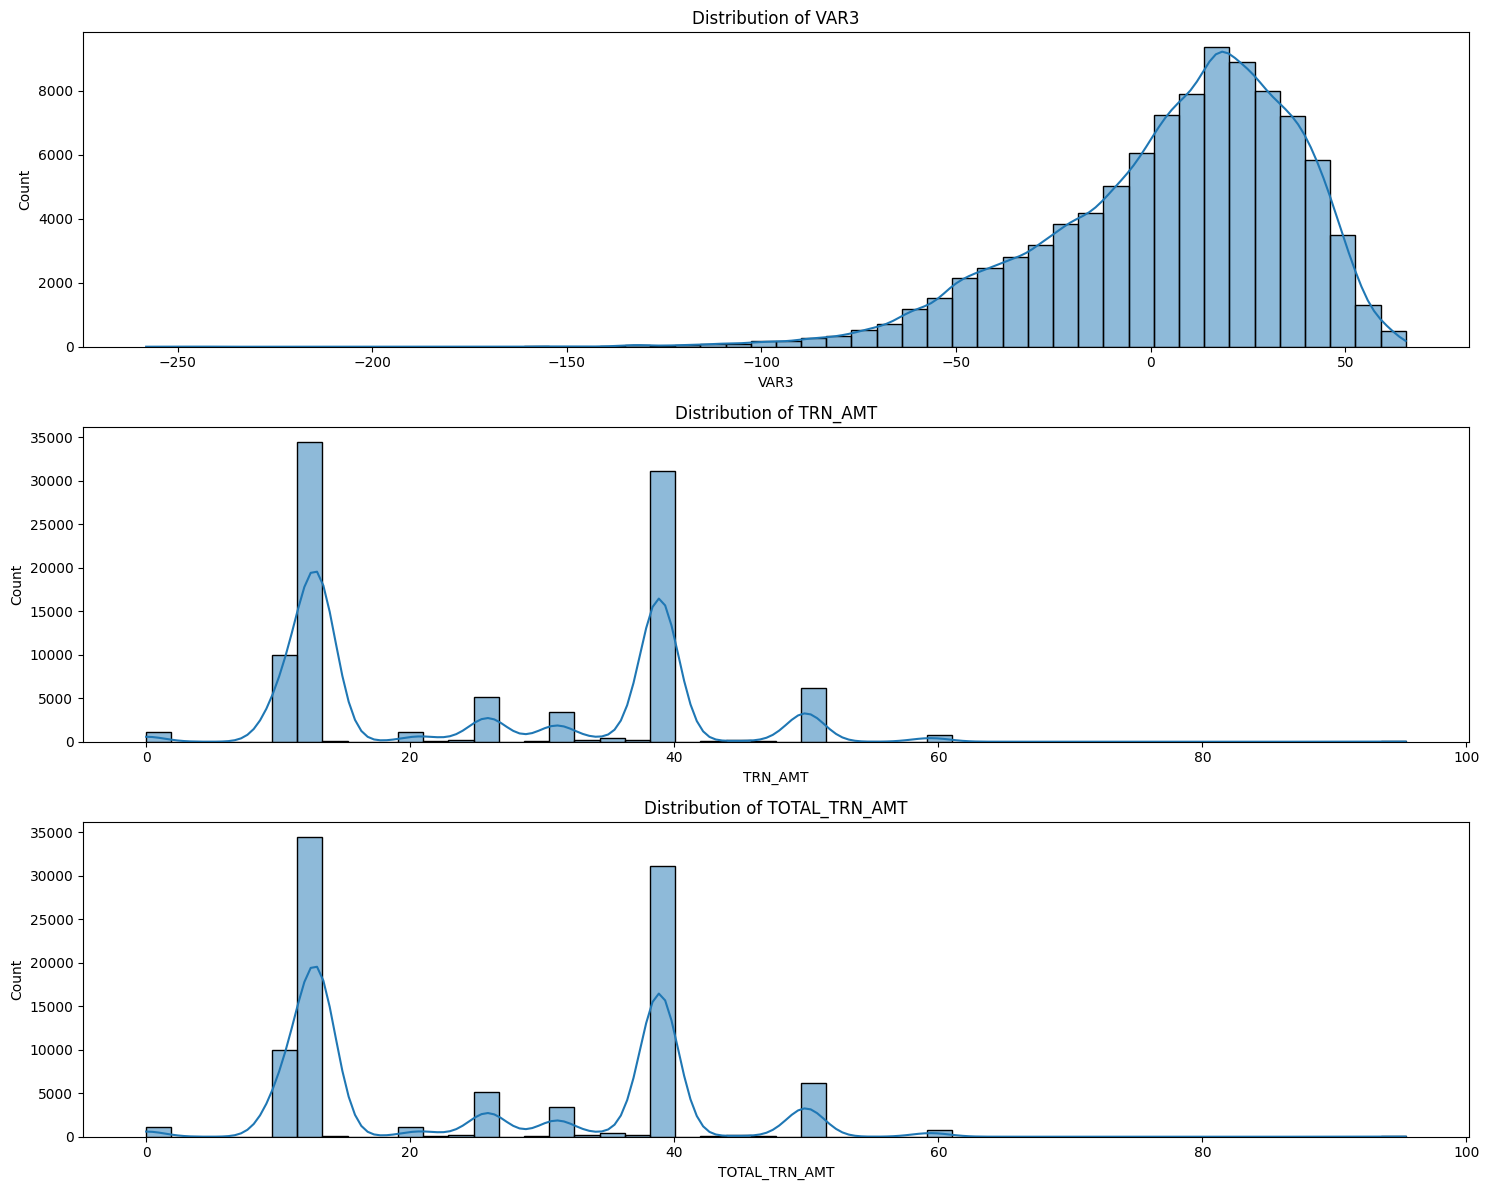

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 12))
sns.histplot(df['VAR3'], kde=True, ax=axes[0], bins=50)
axes[0].set_title('Distribution of VAR3')
sns.histplot(df['TRN_AMT'], kde=True, ax=axes[1], bins=50)
axes[1].set_title('Distribution of TRN_AMT')
sns.histplot(df['TOTAL_TRN_AMT'], kde=True, ax=axes[2], bins=50)
axes[2].set_title('Distribution of TOTAL_TRN_AMT')
plt.tight_layout()
plt.show()

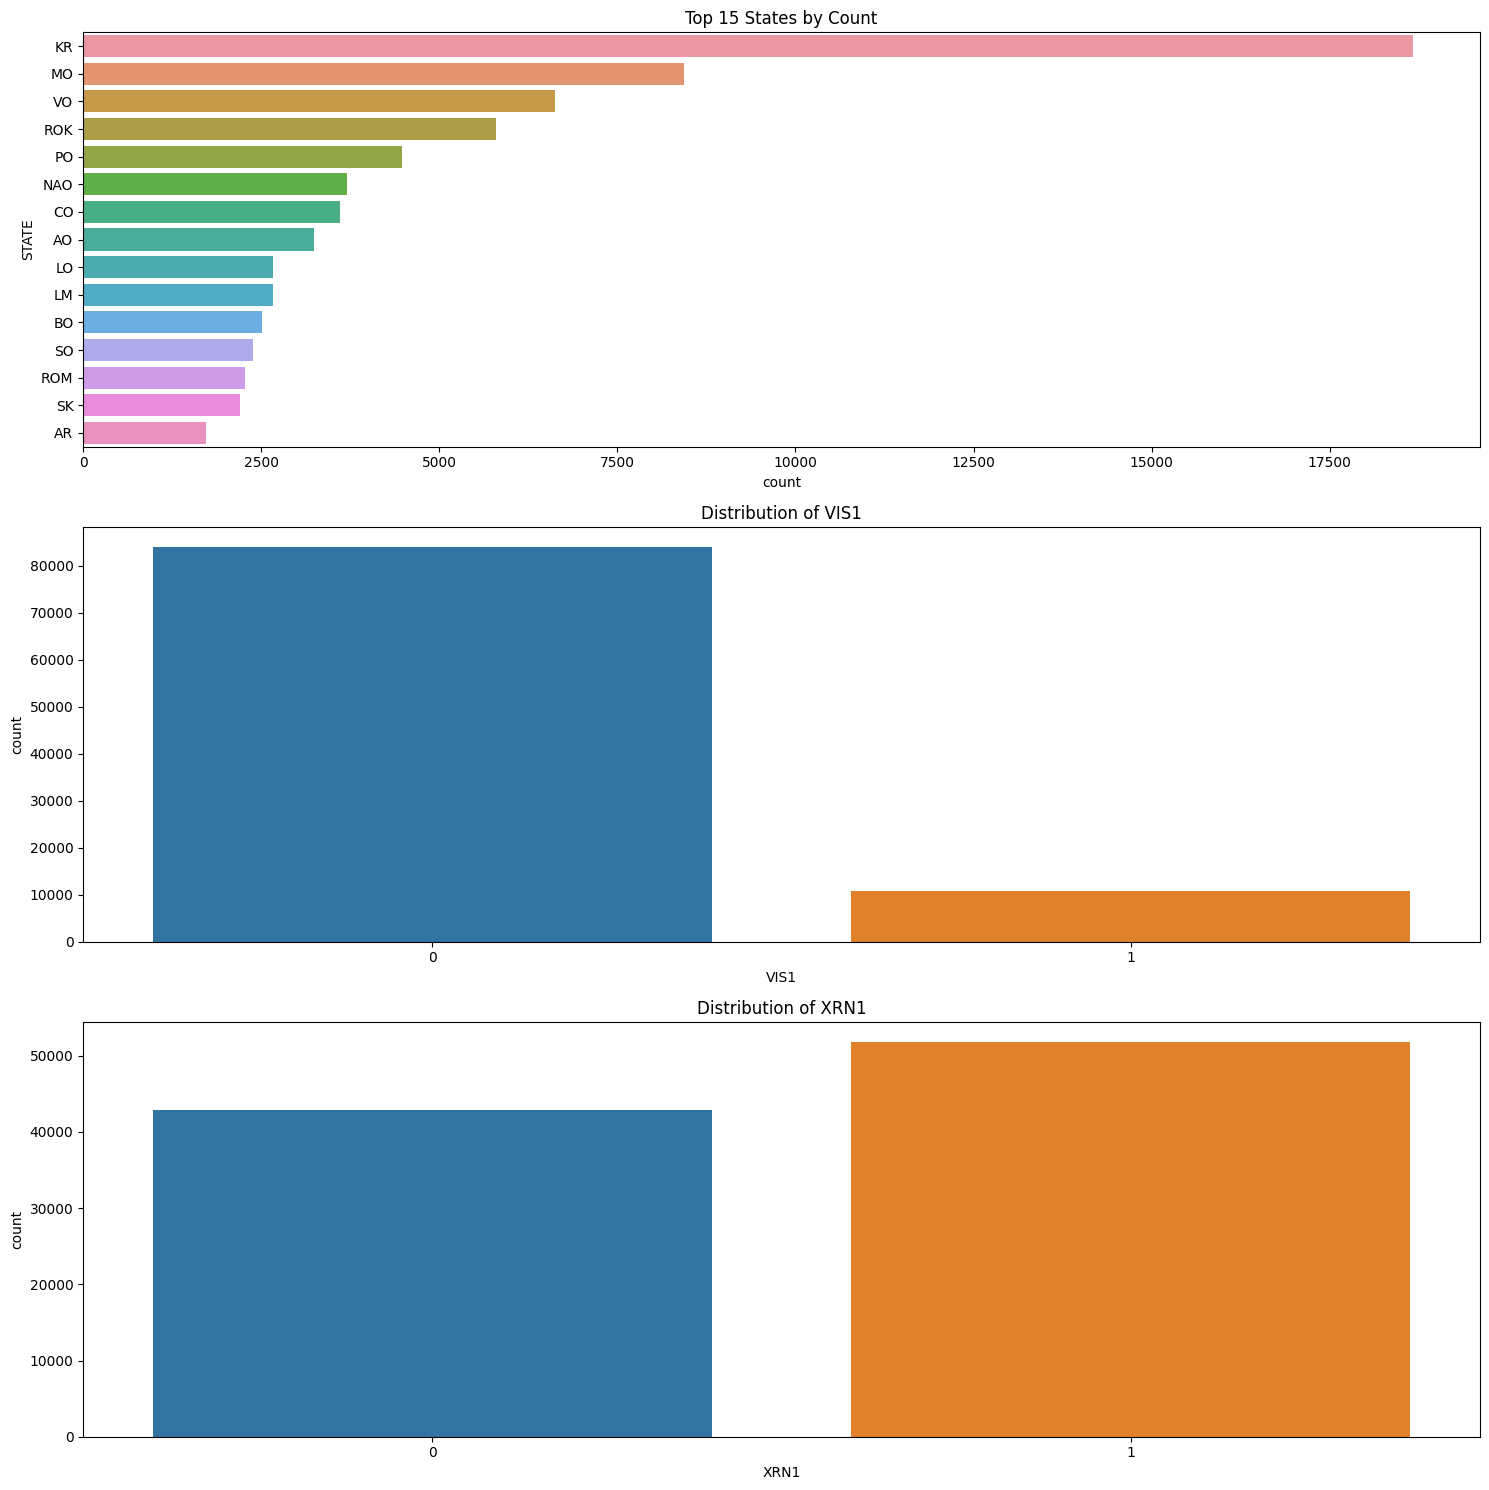

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))
sns.countplot(data=df, y='STATE', order=df['STATE'].value_counts().iloc[:15].index, ax=axes[0])
axes[0].set_title('Top 15 States by Count')
sns.countplot(data=df, x='VIS1', ax=axes[1])
axes[1].set_title('Distribution of VIS1')
sns.countplot(data=df, x='XRN1', ax=axes[2])
axes[2].set_title('Distribution of XRN1')
plt.tight_layout()
plt.show()

<ipython-input-14-048b91759e35>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


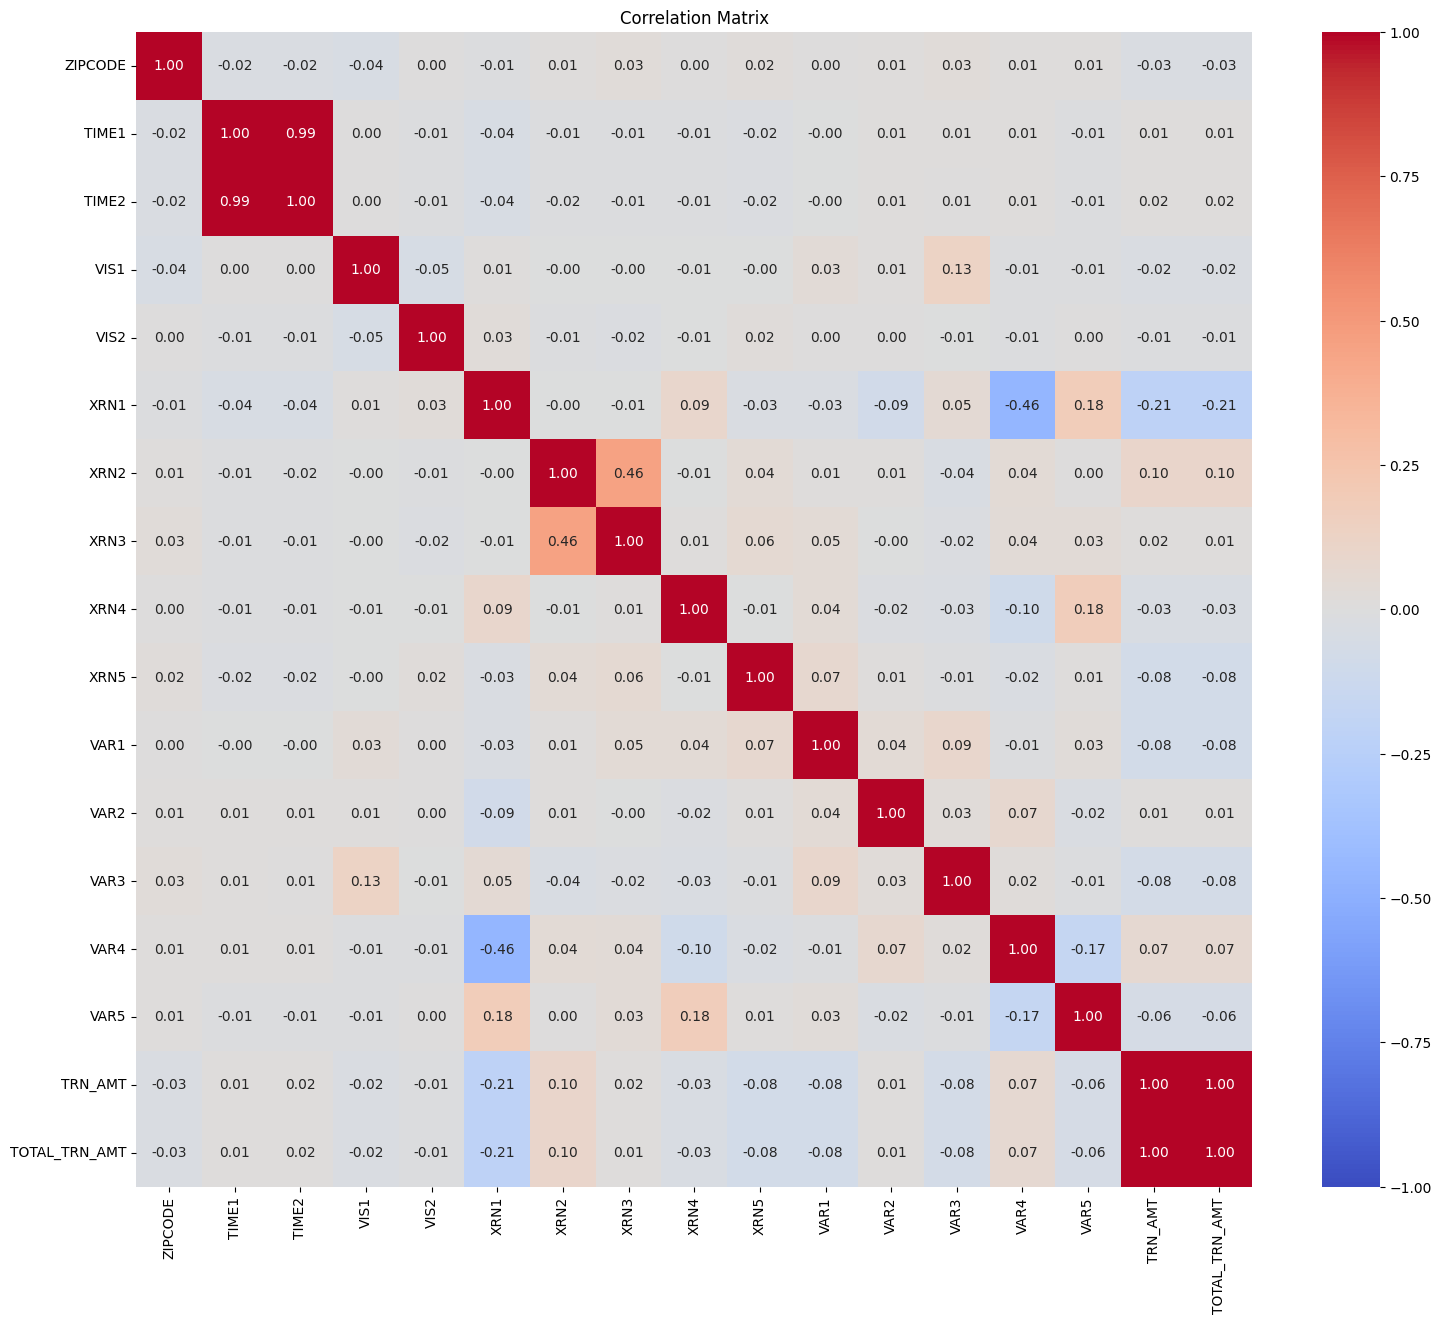

In [14]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


In [15]:
"""df_majority = df[df.TRN_TYPE == 'LEGIT']
df_minority = df[df.TRN_TYPE == 'FRAUD']

df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)
df_balanced = pd.concat([df_majority_downsampled, df_minority])
df_balanced.TRN_TYPE.value_counts()"""

"df_majority = df[df.TRN_TYPE == 'LEGIT']\ndf_minority = df[df.TRN_TYPE == 'FRAUD']\n\ndf_majority_downsampled = resample(df_majority,\n                                   replace=False,\n                                   n_samples=len(df_minority),\n                                   random_state=42)\ndf_balanced = pd.concat([df_majority_downsampled, df_minority])\ndf_balanced.TRN_TYPE.value_counts()"

In [16]:
"""df_balanced['TRN_TYPE'] = df_balanced['TRN_TYPE'].map({'LEGIT': 0, 'FRAUD': 1})
df_balanced.head()"""

"df_balanced['TRN_TYPE'] = df_balanced['TRN_TYPE'].map({'LEGIT': 0, 'FRAUD': 1})\ndf_balanced.head()"

In [17]:
df['TRN_TYPE'] = df['TRN_TYPE'].map({'LEGIT': 0, 'FRAUD': 1})
df.head()

,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,12.95,0
1,NEKSXUK.NET,KK,680,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,38.85,0
2,XOSOP.COM,UO,432,3,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,38.85,0
3,TMA.COM,KR,119,23,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,11.01,0
4,VUHZRNB.COM,PO,614,9,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,12.95,0


In [18]:
#df = df[df['TRN_TYPE'] != 1]

In [19]:
df

,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,12.95,0
1,NEKSXUK.NET,KK,680,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,38.85,0
2,XOSOP.COM,UO,432,3,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,38.85,0
3,TMA.COM,KR,119,23,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,11.01,0
4,VUHZRNB.COM,PO,614,9,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,12.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94677,XOSOP.COM,MO,685,11,11,0,0,0,1,1,0,1,3,0,8.112,15,1,49.95,49.95,0
94678,RONHGNCN.COM,KR,108,16,16,0,0,1,0,0,1,1,4,0,11.248,10,4,12.95,12.95,0
94679,XOSOP.COM,VO,601,18,18,0,0,1,1,1,0,1,2,0,27.824,23,0,38.85,38.85,0
94680,VUHZRNB.COM,LO,398,23,23,0,0,0,0,0,0,1,3,0,31.904,20,0,12.95,12.95,0


In [20]:
#df_balanced = df_balanced.reset_index(drop=True)

In [21]:
df = df.drop(columns=['TRN_AMT','XRN1','XRN2','TIME2'])

<ipython-input-22-048b91759e35>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


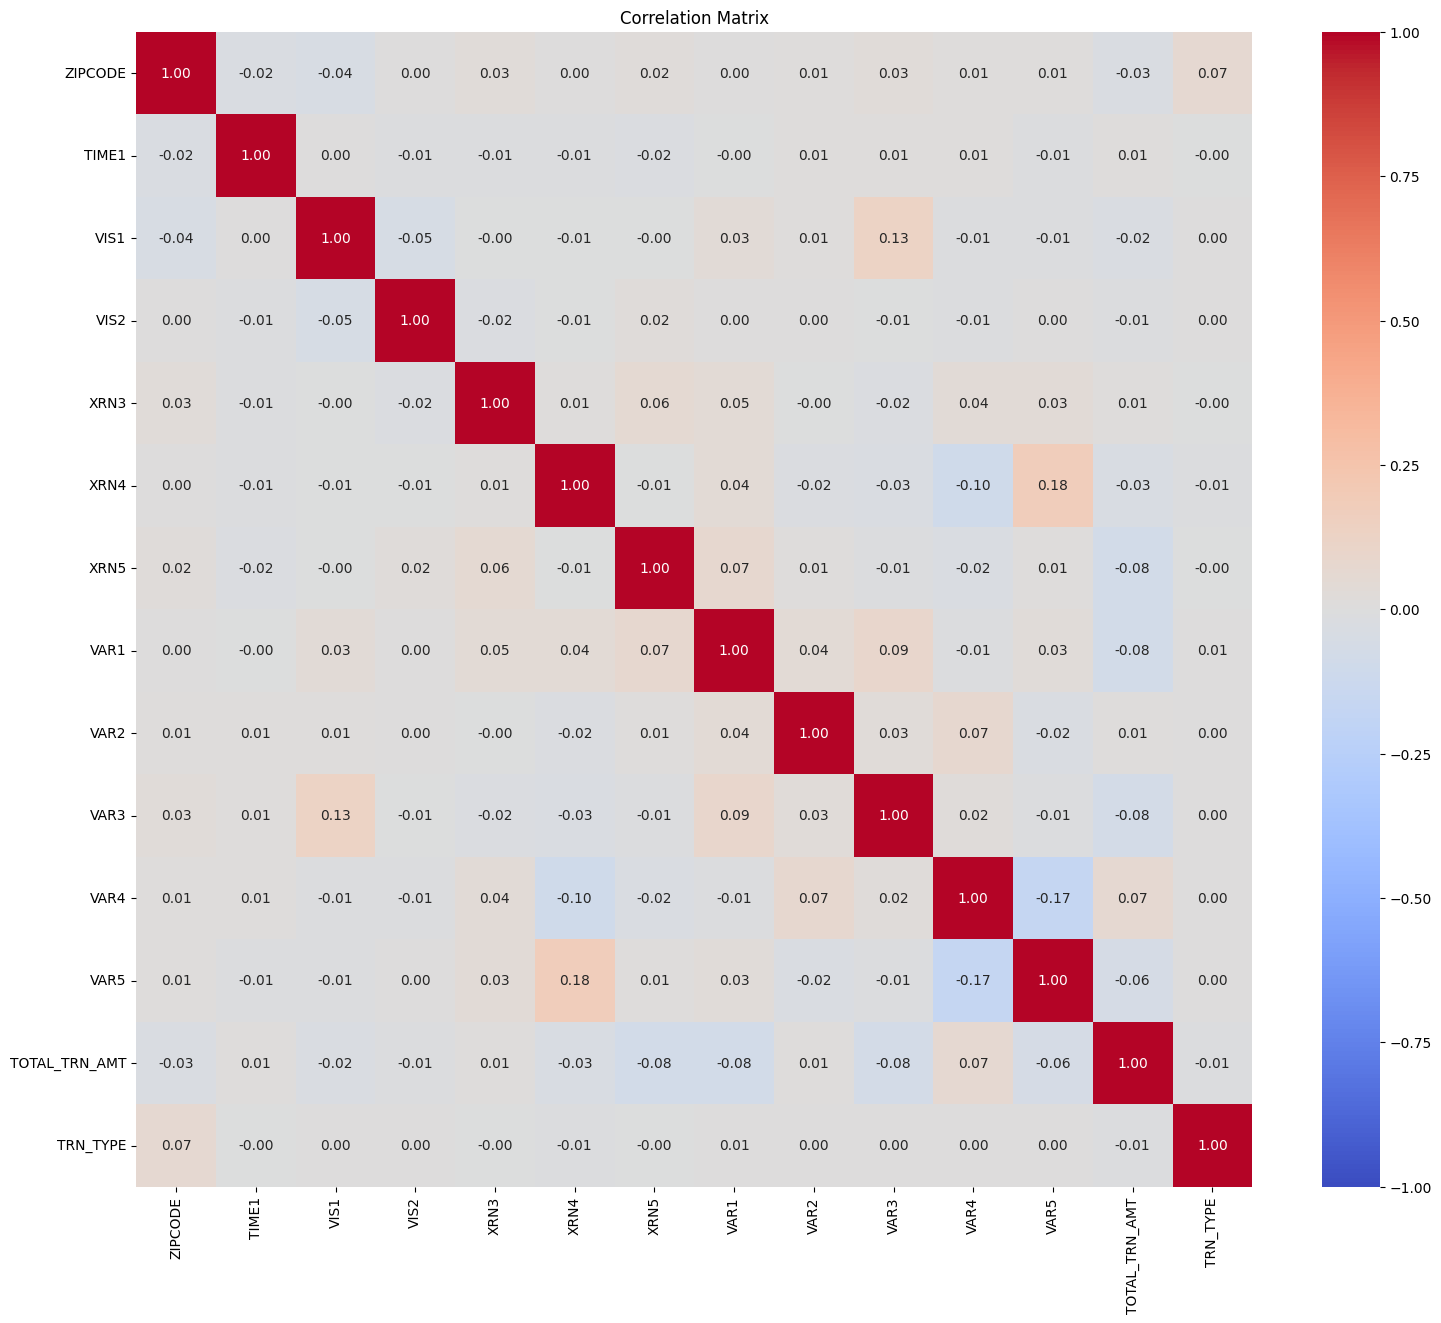

In [22]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


In [23]:
df

,DOMAIN,STATE,ZIPCODE,TIME1,VIS1,VIS2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TOTAL_TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,675,12,1,0,1,0,1,2,1,16.680,34,0,12.95,0
1,NEKSXUK.NET,KK,680,18,1,0,0,0,1,3,0,37.880,23,0,38.85,0
2,XOSOP.COM,UO,432,3,1,0,1,0,1,3,1,-9.080,19,2,38.85,0
3,TMA.COM,KR,119,23,0,0,0,0,3,0,0,-6.392,18,0,11.01,0
4,VUHZRNB.COM,PO,614,9,0,0,0,0,1,3,0,42.512,7,0,12.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94677,XOSOP.COM,MO,685,11,0,0,1,0,1,3,0,8.112,15,1,49.95,0
94678,RONHGNCN.COM,KR,108,16,0,0,0,1,1,4,0,11.248,10,4,12.95,0
94679,XOSOP.COM,VO,601,18,0,0,1,0,1,2,0,27.824,23,0,38.85,0
94680,VUHZRNB.COM,LO,398,23,0,0,0,0,1,3,0,31.904,20,0,12.95,0


In [24]:
"""domain_freq = df['DOMAIN'].value_counts().to_dict()
df['DOMAIN'] = df['DOMAIN'].map(domain_freq)
state_freq = df['STATE'].value_counts().to_dict()
df['STATE'] = df['STATE'].map(state_freq)
df.head()"""

"domain_freq = df['DOMAIN'].value_counts().to_dict()\ndf['DOMAIN'] = df['DOMAIN'].map(domain_freq)\nstate_freq = df['STATE'].value_counts().to_dict()\ndf['STATE'] = df['STATE'].map(state_freq)\ndf.head()"

In [25]:
df['STATE_ZIP'] = df['STATE'].astype(str) + "_" + df['ZIPCODE'].astype(str)


In [27]:
df = df.drop(columns=['STATE', 'ZIPCODE'])

In [65]:
df

,DOMAIN,TIME1,VIS1,VIS2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TOTAL_TRN_AMT,TRN_TYPE,STATE_ZIP
0,819,12,1,0,1,0,1,2,1,16.680,34,0,12.95,0,3
1,4969,18,1,0,0,0,1,3,0,37.880,23,0,38.85,0,15
2,8945,3,1,0,1,0,1,3,1,-9.080,19,2,38.85,0,86
3,7380,23,0,0,0,0,3,0,0,-6.392,18,0,11.01,0,35
4,8258,9,0,0,0,0,1,3,0,42.512,7,0,12.95,0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94677,8945,11,0,0,1,0,1,3,0,8.112,15,1,49.95,0,47
94678,6657,16,0,0,0,1,1,4,0,11.248,10,4,12.95,0,24
94679,8945,18,0,0,1,0,1,2,0,27.824,23,0,38.85,0,88
94680,8258,23,0,0,0,0,1,3,0,31.904,20,0,12.95,0,45


In [29]:
from sklearn.preprocessing import LabelEncoder
domain_encoder = LabelEncoder()
state_encoder = LabelEncoder()

# Fit and transform the columns
df['DOMAIN'] = domain_encoder.fit_transform(df['DOMAIN'])
df['STATE_ZIP'] = state_encoder.fit_transform(df['STATE_ZIP'])
df.head()


,DOMAIN,TIME1,VIS1,VIS2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TOTAL_TRN_AMT,TRN_TYPE,STATE_ZIP
0,819,12,1,0,1,0,1,2,1,16.680,34,0,12.95,0,3
1,4969,18,1,0,0,0,1,3,0,37.880,23,0,38.85,0,15
2,8945,3,1,0,1,0,1,3,1,-9.080,19,2,38.85,0,86
3,7380,23,0,0,0,0,3,0,0,-6.392,18,0,11.01,0,35
4,8258,9,0,0,0,0,1,3,0,42.512,7,0,12.95,0,56


In [25]:
#!pip install category_encoders


In [30]:
df.shape


(94682, 15)

In [38]:
df[df['TRN_TYPE']==1]

,DOMAIN,TIME1,VIS1,VIS2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TOTAL_TRN_AMT,TRN_TYPE,STATE_ZIP
57,8258,19,0,0,0,0,1,3,0,45.376,19,3,12.95,1,13
141,7380,14,0,0,1,0,1,2,1,40.400,9,0,11.01,1,48
186,8945,19,0,0,0,0,1,4,1,50.648,21,4,0.00,1,38
283,654,13,0,0,0,0,1,3,1,39.848,8,0,36.26,1,36
290,7380,21,0,0,1,0,1,0,0,-9.624,24,0,12.95,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94528,9083,8,0,0,0,0,1,3,0,-23.080,23,0,44.85,1,4
94544,7380,13,0,0,0,0,1,2,0,-13.856,22,0,12.95,1,85
94565,8258,7,0,0,0,0,1,3,1,32.664,26,3,25.90,1,4
94606,8945,20,0,0,0,0,1,2,1,12.120,22,0,38.85,1,85


In [28]:
"""from sklearn.preprocessing import StandardScaler
cols_to_scale = ['TIME1', 'TIME2', 'VIS1', 'VIS2', 'XRN3', 'XRN4', 'XRN5',
                 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'TOTAL_TRN_AMT']

# Apply StandardScaler to the specified columns
scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

df.head()"""

"from sklearn.preprocessing import StandardScaler\ncols_to_scale = ['TIME1', 'TIME2', 'VIS1', 'VIS2', 'XRN3', 'XRN4', 'XRN5', \n                 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'TOTAL_TRN_AMT']\n\n# Apply StandardScaler to the specified columns\nscaler = StandardScaler()\ndf[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])\n\ndf.head()"

In [29]:
# Sum the specified features for each row
"""df['TOTAL_SUM'] = df[['DOMAIN', 'STATE', 'ZIPCODE', 'TIME1', 'TIME2', 'VIS1', 'VIS2',
                          'XRN1', 'XRN2', 'XRN3', 'XRN4', 'XRN5', 'VAR1', 'VAR2', 'VAR3',
                          'VAR4', 'VAR5', 'TRN_AMT', 'TOTAL_TRN_AMT']].sum(axis=1)

# Scatter plot of TOTAL_SUM vs TRN_TYPE
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['TOTAL_SUM'], y=df['TRN_TYPE'], hue=df['TRN_TYPE'], palette="coolwarm")
plt.title('Scatter Plot of TOTAL_SUM vs TRN_TYPE')
plt.xlabel('TOTAL_SUM')
plt.ylabel('TRN_TYPE')
plt.show()"""


'df[\'TOTAL_SUM\'] = df[[\'DOMAIN\', \'STATE\', \'ZIPCODE\', \'TIME1\', \'TIME2\', \'VIS1\', \'VIS2\', \n                          \'XRN1\', \'XRN2\', \'XRN3\', \'XRN4\', \'XRN5\', \'VAR1\', \'VAR2\', \'VAR3\', \n                          \'VAR4\', \'VAR5\', \'TRN_AMT\', \'TOTAL_TRN_AMT\']].sum(axis=1)\n\n# Scatter plot of TOTAL_SUM vs TRN_TYPE\nplt.figure(figsize=(12, 8))\nsns.scatterplot(x=df[\'TOTAL_SUM\'], y=df[\'TRN_TYPE\'], hue=df[\'TRN_TYPE\'], palette="coolwarm")\nplt.title(\'Scatter Plot of TOTAL_SUM vs TRN_TYPE\')\nplt.xlabel(\'TOTAL_SUM\')\nplt.ylabel(\'TRN_TYPE\')\nplt.show()'

In [32]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and temporary sets with stratification
X = df.drop('TRN_TYPE', axis=1)
y = df['TRN_TYPE']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Splitting the temporary set into validation and test sets with stratification
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

X_train.shape, X_val.shape, X_test.shape



((66277, 14), (14202, 14), (14203, 14))

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the training set
scaler.fit(X_train)

# Transform the datasets
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]  # Display the first 5 rows of the scaled training data for inspection


array([[ 0.90706318,  0.97294958, -0.35758856, -0.13665466, -0.81925072,
        -0.14188967, -0.05086699,  1.57378735, -0.86045106,  1.62540871,
        -1.07039123,  0.25640332, -1.80371172, -0.81054162],
       [ 0.30460452,  0.59405769, -0.35758856, -0.13665466,  1.22062755,
         7.04772937, -0.03167785,  0.57790333, -0.86045106, -0.17712473,
        -1.22384772, -0.56737111, -1.0742847 ,  1.55342813],
       [-1.44670323,  1.54128742, -0.35758856, -0.13665466, -0.81925072,
        -0.14188967, -0.05086699,  1.57378735,  1.16218114,  0.7921114 ,
         1.07799957, -0.56737111,  2.37852429,  1.75042561],
       [-0.1783885 ,  0.2151658 , -0.35758856, -0.13665466, -0.81925072,
        -0.14188967, -0.05086699,  0.57790333, -0.86045106,  0.7004615 ,
        -0.91693474, -0.56737111,  0.93163961, -0.18014969],
       [ 0.65530582,  0.40461174, -0.35758856, -0.13665466, -0.81925072,
        -0.14188967, -0.05086699,  0.57790333,  1.16218114,  0.50564145,
        -0.61002177, -0.56

In [60]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(n_estimators=95, contamination=0.17, random_state=42)

# Train the model
clf.fit(X_train_scaled)

# Predict anomalies on the validation set
val_predictions = clf.predict(X_val_scaled)

# Convert the predicted values: -1 (anomaly) to 1 (fraud) and 1 (inlier) to 0 (legit)
val_predictions = [1 if i == -1 else 0 for i in val_predictions]

val_predictions[:10]  # Display the first 10 predictions for inspection


[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [61]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate the confusion matrix for the validation set
conf_matrix = confusion_matrix(y_val, val_predictions)

# Generate a classification report for the validation set
class_report = classification_report(y_val, val_predictions)

conf_matrix, class_report


(array([[11585,  2303],
        [  259,    55]]),
 '              precision    recall  f1-score   support\n\n           0       0.98      0.83      0.90     13888\n           1       0.02      0.18      0.04       314\n\n    accuracy                           0.82     14202\n   macro avg       0.50      0.50      0.47     14202\nweighted avg       0.96      0.82      0.88     14202\n')

0.819602872834812

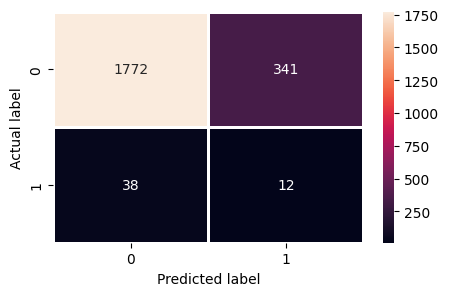

In [63]:

plt.figure(figsize=(5,3))
y_actu = pd.Series(y_val, name='Actual')
y_pred = pd.Series(val_predictions, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, linewidths = 2, annot=True, fmt="d")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

accuracy_score(y_val, val_predictions)

In [66]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [62]:
from sklearn.preprocessing import StandardScaler


sample_data= {
    'DOMAIN': [2, 3918, 15814, 16451, 11544, 57, 141, 186, 283, 290],
    'STATE_ZIP': [13, 48, 38, 36, 6, 4, 85, 4, 85, 47],
    'TIME1': [12, 18, 3, 23, 9, 679, 369, 122, 120, 670],
    'VIS1': [1, 1, 1, 0, 0, 19, 14, 19, 13, 21],
    'VIS2': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'XRN3': [1, 0, 1, 0, 0, 0, 1, 0, 0, 1],
    'XRN4': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'XRN5': [1, 1, 1, 3, 1, 1, 1, 1, 1, 1],
    'VAR1': [2, 3, 3, 0, 3, 3, 2, 4, 3, 0],
    'VAR2': [1, 0, 1, 0, 0, 0, 1, 1, 1, 0],
    'VAR3': [16.68, 37.88, -9.08, -6.392, 42.512, 45.376, 40.400, 50.648, 39.848, -9.624],
    'VAR4': [34, 23, 19, 18, 7, 19, 9, 21, 8, 24],
    'VAR5': [0, 0, 2, 0, 0, 3, 0, 4, 0, 0],
    'TOTAL_TRN_AMT': [12.95, 38.85, 38.85, 11.01, 12.95, 12.95, 11.01, 0.00, 36.26, 12.95]
}


input_data = pd.DataFrame(sample_data)

scaler = StandardScaler()
scaled_input_data = scaler.fit_transform(input_data)

predictions = clf.predict(scaled_input_data)

predictions = [1 if i == -1 else 0 for i in predictions]

predictions


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]